In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [189]:
df= pd.read_csv("wine.csv")

In [190]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [191]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [192]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [194]:
df1=df.drop("Type", axis=1)
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [195]:
df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:xlabel='Proline'>

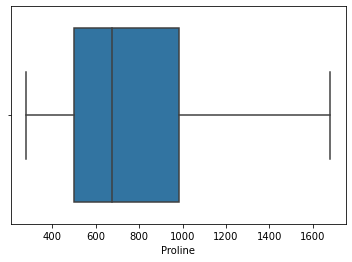

In [196]:
sns.boxplot(x="Proline", data=df1)

In [197]:
minmax_df= MinMaxScaler().fit_transform(df1)       # Scaling the data using minmax scalar
minmax_df

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [198]:
# Applying the Kmeans clustering 
no_of_clusters=[2,3,4,5,6,7,8,9,10]
for num in no_of_clusters:
    kmeans= KMeans(n_clusters= num, random_state= 42)
    clus_label= kmeans.fit_predict(minmax_df)
    sil_score=silhouette_score(minmax_df, clus_label)
    print(f"For {num} of clusters, sil score is {sil_score}")

For 2 of clusters, sil score is 0.2987221815974774
For 3 of clusters, sil score is 0.3008938518500134
For 4 of clusters, sil score is 0.25993667561623146
For 5 of clusters, sil score is 0.21424859588983408
For 6 of clusters, sil score is 0.2097680057699801
For 7 of clusters, sil score is 0.14186088543771605
For 8 of clusters, sil score is 0.14016844369689987
For 9 of clusters, sil score is 0.15162609924006978
For 10 of clusters, sil score is 0.1439602389980226


In [199]:
# Plotting the elbow curve to find optimum number of clusters
wcss= []
for i in range (2,11):
    kmeans1= KMeans(n_clusters=i, random_state=42).fit(minmax_df)
    wcss.append(kmeans1.inertia_)

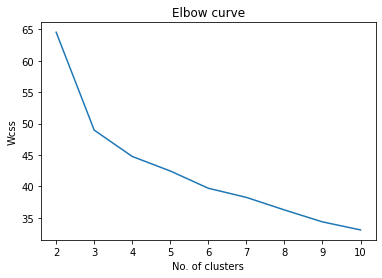

In [200]:
plt.plot(range(2,11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Wcss")
plt.title("Elbow curve")
plt.show()

### from Elbow curve and silhouette Score, we can see that optimum number of clusters are 3

In [201]:
kmeans=KMeans(n_clusters=3, random_state=42)
cl=kmeans.fit_predict(minmax_df)
cl

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

<AxesSubplot:xlabel='cl', ylabel='count'>

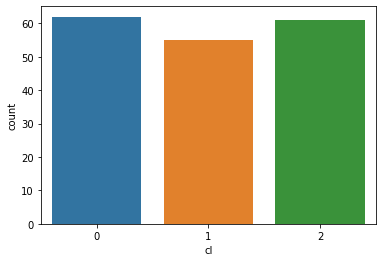

In [202]:
df4=df.copy()
df4["cl"]=cl
sns.countplot(x="cl", data=df4)

In [203]:
df4.cl.value_counts()

0    62
2    61
1    55
Name: cl, dtype: int64

# Applyng PCA on Minmax scaled data

In [204]:
pca= PCA(n_components=8, random_state=42)
pca_df=pca.fit_transform(minmax_df)

In [205]:
np.cumsum(pca.explained_variance_ratio_)*100

array([40.74948456, 59.71983634, 68.28150696, 75.70818476, 81.27348586,
       85.93232305, 89.59625195, 92.00504125])

In [206]:
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247, 0.04011226, 0.03005877,
       0.02516286, 0.01978926, 0.01301012])

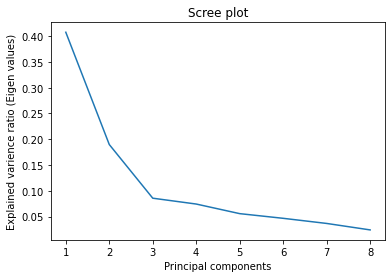

In [207]:
# scree plot
pc_values= np.arange(pca.n_components_)+1
plt.plot(pc_values, pca.explained_variance_ratio_)
plt.title("Scree plot")
plt.xlabel("Principal components")
plt.ylabel("Explained varience ratio (Eigen values)")
plt.show()

In [208]:
#from scree plot it an be seen that 3 principal componets can be slected

# Selecting first 3 Principal components

In [209]:
pca1= PCA(n_components=3, random_state=42)
pca3_df= pca1.fit_transform(minmax_df)
pca3_df=pd.DataFrame(pca3_df)
pca3_df.columns= ["PC1", "PC2", "PC3"]
pca3_df

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


In [210]:
# Plotting the elbow curve to find optimum number of clusters
wcss1= []
for i in range (2,11):
    kmeans2= KMeans(n_clusters=i, random_state=42).fit(pca3_df)
    wcss1.append(kmeans2.inertia_)

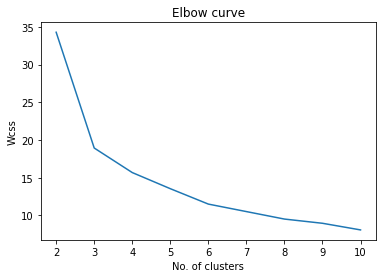

In [211]:
plt.plot(range(2,11),wcss1)
plt.xlabel("No. of clusters")
plt.ylabel("Wcss")
plt.title("Elbow curve")
plt.show()

In [212]:
kmeans3= KMeans(n_clusters=3, random_state=42)
clust_lables= kmeans3.fit_predict(pca3_df)
clust_lables

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [213]:
df3=df.copy()

In [214]:
df3["Clust_lables"]= clust_lables
df3.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust_lables
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [215]:
df3.Clust_lables.value_counts()

1    65
0    62
2    51
Name: Clust_lables, dtype: int64

<AxesSubplot:xlabel='Clust_lables', ylabel='count'>

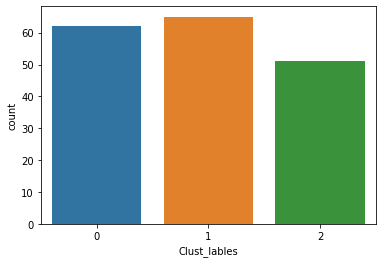

In [216]:
sns.countplot(x="Clust_lables", data=df3)

In [217]:
silcore= silhouette_score(pca3_df, clust_lables)
silcore

0.4779662656834764

In [218]:
df4=pd.concat([df3, pca3_df], axis=1)
df4.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust_lables,PC1,PC2,PC3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,-0.706336,-0.253193,0.024093
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,-0.484977,-0.008823,-0.280482
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,-0.521172,-0.189187,0.196217
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,-0.821644,-0.580906,0.081110
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,-0.202546,-0.059467,0.300240


<AxesSubplot:xlabel='PC2', ylabel='PC1'>

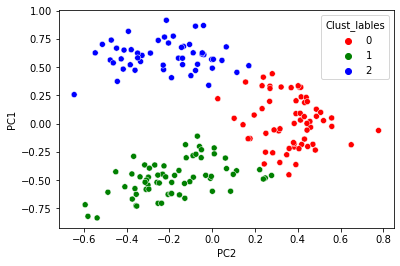

In [219]:
sns.scatterplot(x="PC2", y="PC1", data=df4, hue= "Clust_lables", palette=["r", "g", "b"])

# Using heirarchical clustring on PCA data with 3 components

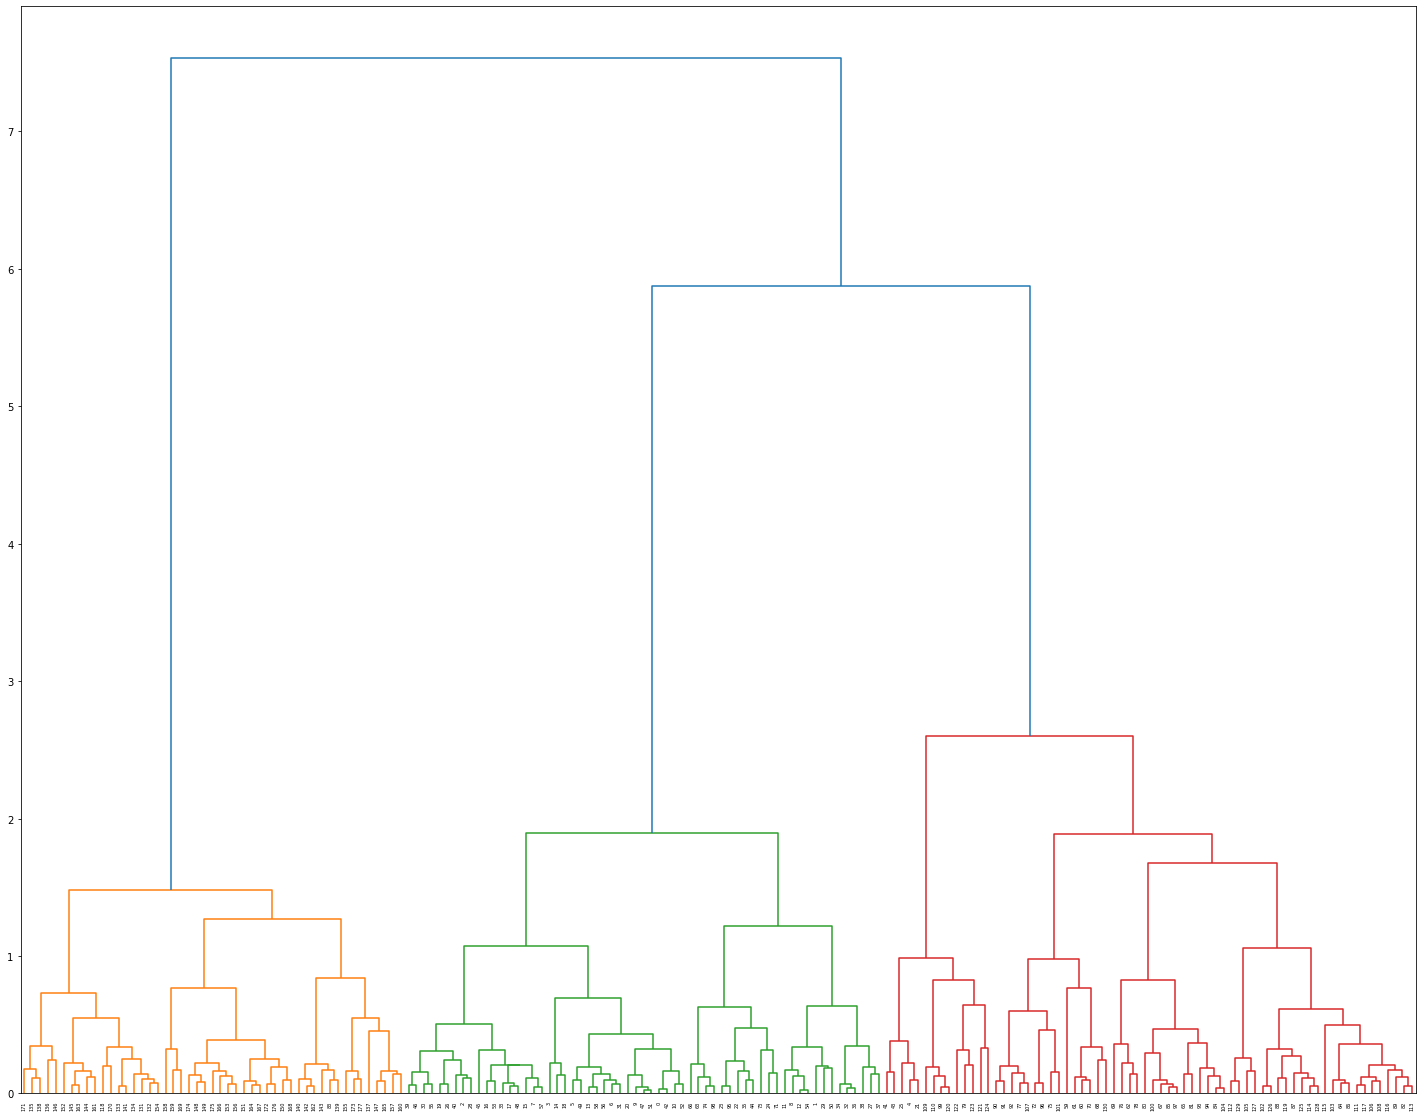

In [220]:
plt.figure(figsize=(25,20))
den= sch.dendrogram(sch.linkage(pca3_df, "ward"))

In [221]:
cluster= AgglomerativeClustering(n_clusters=3, linkage="ward")
clust_he= cluster.fit_predict(pca3_df)
clust_he

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [222]:
df5=df.copy()
df5["lables"]= clust_he

<AxesSubplot:xlabel='lables', ylabel='count'>

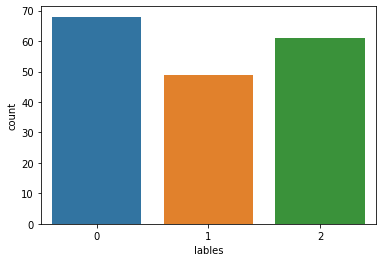

In [223]:
sns.countplot(x="lables", data=df5)

In [224]:
df5.lables.value_counts()

0    68
2    61
1    49
Name: lables, dtype: int64

In [227]:
df6= pd.concat([df5, pca3_df], axis=1)
df6.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,lables,PC1,PC2,PC3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,-0.706336,-0.253193,0.024093
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,-0.484977,-0.008823,-0.280482
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,-0.521172,-0.189187,0.196217
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,-0.821644,-0.580906,0.081110
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,-0.202546,-0.059467,0.300240


<AxesSubplot:xlabel='PC2', ylabel='PC1'>

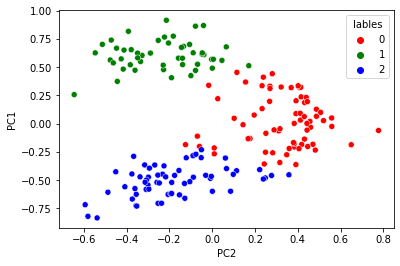

In [229]:
sns.scatterplot(x="PC2", y="PC1", data= df6, hue="lables" , palette=["r", "g", "b"] )